In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [3]:
ratings = pd.read_csv("all_datasets/movielens/ratings.csv")
movies = pd.read_csv("all_datasets/content_based/completed_movies_info.csv", index_col=0)
ratings.drop(columns=['timestamp'], inplace=True)

In [6]:
user_rating_count = ratings['userId'].value_counts().to_numpy()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


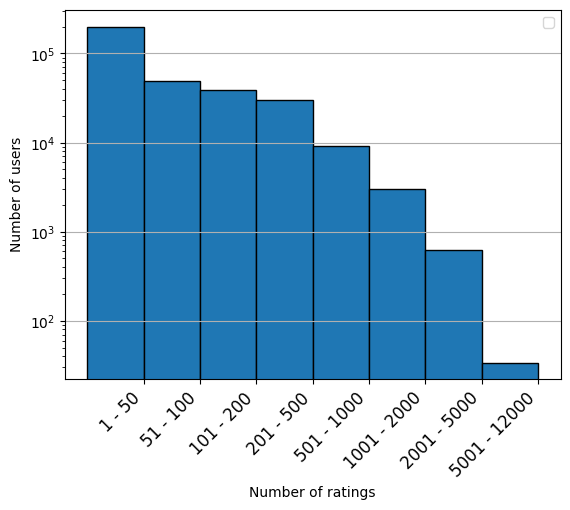

In [61]:
# Number of users per rating groups
data = user_rating_count

bins = [0, 50, 100, 200, 500, 1000, 2000, 5000, 12000]

hist, bin_edges = np.histogram(data,bins)

fig,ax = plt.subplots()

ax.bar(range(len(hist)),hist,width=1,edgecolor='black')


ax.set_xticks([0.5+i for i,j in enumerate(hist)])
ax.set_yscale('log')

ax.set_xticklabels(['{} - {}'.format(bins[i]+1,bins[i+1]) for i,j in enumerate(hist)], rotation=45, ha='right', fontsize=12)

plt.grid(axis='y')

plt.legend()

plt.ylabel('Number of users')
plt.xlabel('Number of ratings')



plt.show()

In [10]:
avg_ratings = ratings.groupby('userId')['rating'].mean().to_numpy()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


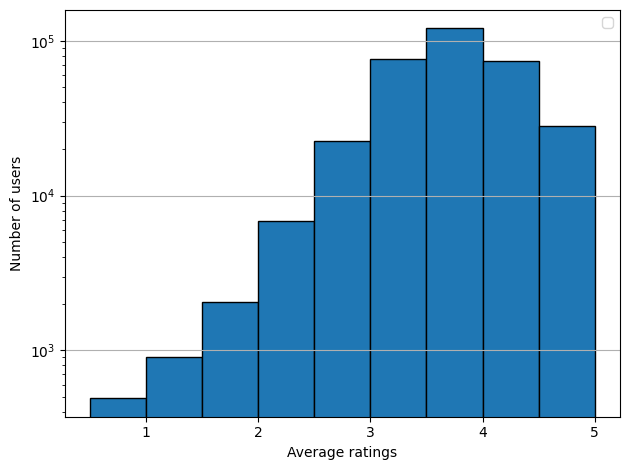

In [62]:
# Average ratings per users
data = avg_ratings

bins = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]

plt.hist(data, bins=bins, edgecolor='black', log=True)

plt.legend()

plt.xlabel('Average ratings')
plt.ylabel('Number of users')
plt.grid(axis='y')

plt.tight_layout()

plt.show()

In [22]:
movie_ratings_avg = ratings.groupby('movieId')['rating'].mean().to_numpy()
movie_ratings_cnt = ratings.groupby('movieId')['rating'].count().to_numpy()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


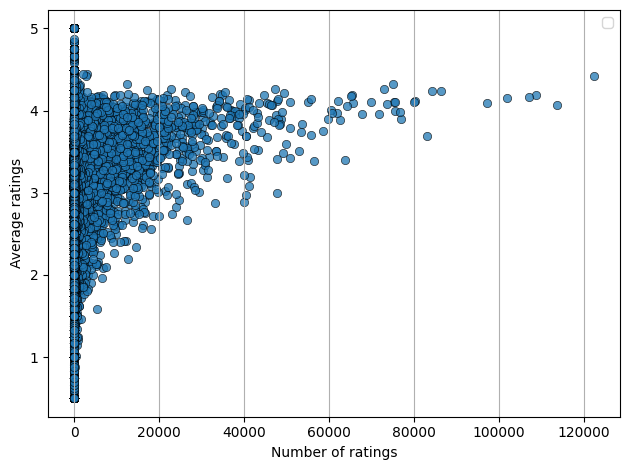

In [63]:
# Number of ratings to average ratings
plt.scatter(movie_ratings_cnt, movie_ratings_avg,
            edgecolor='black', linewidth=0.5, alpha=0.75)

plt.legend()

plt.xlabel('Number of ratings')
plt.ylabel('Average ratings')
plt.grid(axis='x')

plt.tight_layout()

plt.show()

In [44]:
genres_df = movies['genres'].str.get_dummies('|')
genres_series = genres_df.sum(axis=0)
genre_name = genres_series.index.to_numpy()
genre_cnt = genres_series.to_numpy()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


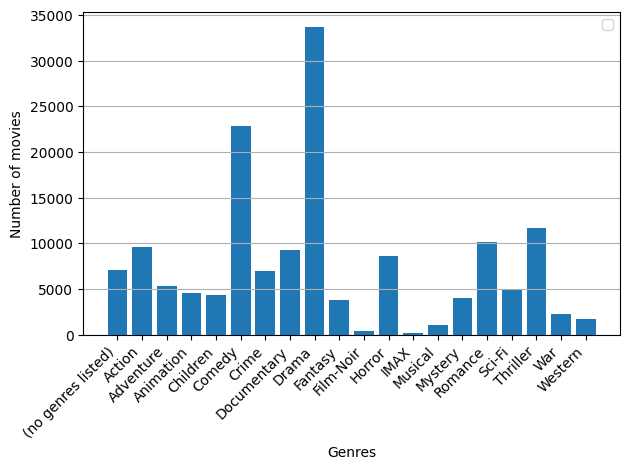

In [69]:
# Movies’ genres count
plt.bar(genre_name, genre_cnt)

plt.legend()

plt.xlabel('Genres')
plt.ylabel('Number of movies')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()

plt.show()